In [1]:
%matplotlib inline

import os
import random
import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

DATA_DIR = '../local_data/features/'

In [2]:
%%time

X = np.load(os.path.join(DATA_DIR, 'features.npy'))
y = np.load(os.path.join(DATA_DIR, 'labels.npy'))[0]

clf = RandomForestClassifier(n_estimators=25, n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Fit the model
clf.fit(X_train, y_train)

# Perform the predictions
y_predicted = clf.predict(X_test)

CPU times: user 1min 58s, sys: 620 ms, total: 1min 59s
Wall time: 17.4 s


In [3]:
from sklearn.metrics import accuracy_score
print("Accuracy = {} %".format(accuracy_score(y_test, y_predicted)*100))

from sklearn.metrics import classification_report
print("Classification Report \n{}".format(classification_report(y_test, y_predicted)))

Accuracy = 99.41669965148722 %
Classification Report 
                 precision    recall  f1-score   support

         Normal       1.00      1.00      1.00    500734
    brute_force       0.98      0.99      0.99       495
           ddos       0.94      0.53      0.68       951
       internal       0.83      0.73      0.78      5028
irc_botnet_ddos       0.97      0.96      0.96      9351
ssh_brute_force       1.00      0.97      0.98      1356

    avg / total       0.99      0.99      0.99    517915



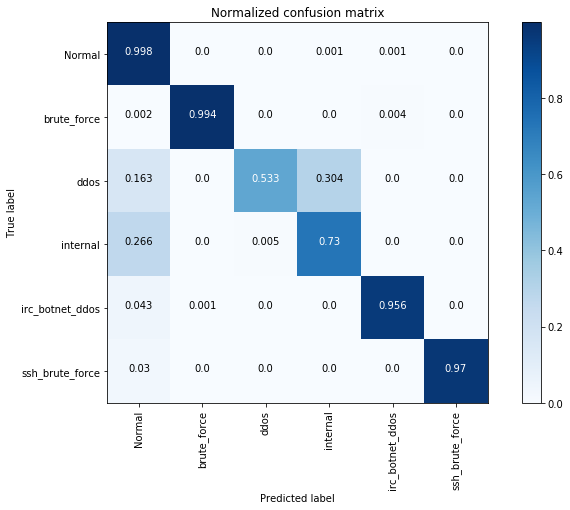

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=cmap.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.round(cm,3)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = ['Normal', 'brute_force', 'ddos', 'internal', 'irc_botnet_ddos', 'ssh_brute_force']

matplotlib.rcParams['figure.figsize'] = [10.0, 7.0] # resize graph
plt.figure()
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(confusion_matrix(y_test, y_predicted), classes=class_names,
                      title='Normalized confusion matrix')